<b><p style="text-align:center;">
    </p></b>

<b><p style="color:blue;font-size:50px;">Importation </p></b>

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from collections import Counter
import difflib

In [33]:
#help(matplotlib)
#help(pd)
#help(sns)
#help(np)

In [34]:
#Liste all the hyperparam,param
#list(matplotlib.colors.cnames.keys())
#0list(matplotlib.bins.cnames.keys())


<b><p style="color:blue;font-size:50px;">Load Data </p></b>

In [35]:
#Transform excel to csv
#read_file = pd.read_excel (r'DataScrap/dataset.xlsx')
#read_file.to_csv (r'dataset.csv', index = None, header=True)

#
df=pd.read_csv("dataset.csv", sep=",")


In [36]:
# Let's take a look at our data
df.head()

,Marque,Ingr,Rating,Reference
0,Etat Libre dOrange,"RICINUS COMMUNIS (CASTOR) SEED OIL, STEARETH-...",2.9,Hermann a Mes Cotes Me Paraissait Une Ombre Ea...
1,Ted Lapidus,"DIMETHICONE, CI 42090 (FD&C BLUE NO, BUTYLPHE...",3.6,Oud Blanc Eau de Parfum mixte
2,Lancome,"\nCINNAMAL, SODIUM PHOSPHATE, ALPHA-ISOMETHYL...",3.9,La Nuit Tresor Intense Eau de Parfum pour femme
3,Guess,"ALCOHOL DENAT, TOCOPHEROL, ,#13380 ALCOHOL, ...",5.0,Seductive Noir Eau de Toilette pour femme
4,Pitbull,"CI 42090 (BLUE 1), PARFUM (FRAGRANCE) –, SODI...",4.9,Pitubull Woman Eau de Parfum pour femme


<b><p style="color:blue;font-size:50px;">Data Cleaning </p></b>

<b><p style="color:green;">Etape 1 : On a crée une liste poubelle qui regroupe tout les éléments qui ne sont pas des ingrédients et regroupé les éléments qui se ressemble ("water" et "aqua") ("Parfum" et "Fragrance") puis on a crée la liste avec le nombre d'occurence </p></b>


In [37]:

liste_corve=[" CETTE LISTE D'INGR&EACUTE"," JOUR"," 1)"," AVANT D’"," 10)"," FD&"," 40)"," 5)","DIENTS ENTRANT DANS LA COMPOSITION DES PRODUITS DE NOTRE MARQUE SONT R&EACUTE"," AVANT D'UTILISER UN PRODUIT DE NOTRE MARQUE"," VOTRE UTILISATION PERSONNELLE","DA L’ORÉAL REGELMÄßIG NEUE WISSENSCHAFTLICHE ERKENNTNISSE IN DIE PRODUKTFORMULIERUNG EINFLIEßEN LÄSST"," KÖNNEN VON EINER REFERENZ VERSCHIEDENE VERSIONEN MIT UNTERSCHIEDLICHEN ZUSAMMENSETZUNGEN IM UMLAUF SEIN","TES INVIT&EACUTE"," PARFUM"," SIE GELTEN STETS NUR FÜR DAS JEWEILS BEZEICHNETE PRODUKT MIT DER DAZU ANGEGEBENEN PRODUKT-REFERENZNUMMER"," PARFUM (FRAGRANCE) AQUA (WATER) BENZYL SALICYLATE LINALOOL HEXYL CINNAMAL HYDROXYCITRONELLAL ALPHA-ISOMETHYL IONONE CITRONELLOL LIMONENE GERANIOL EUGENOL BENZYL BENZOATE BENZYL ALCOHOL CITRAL","DIENTS FIGURANT SUR SON EMBALLAGE AFIN DE VOUS ASSURER QUE LES INGR&EACUTE"," LIRE LA LISTE D'INGR&EACUTE"]
def Ccleaner(string):
    """ 
    Fonction pour clean les mauvais ingrédients
    """
    if ("AQUA" in string) or ("WATER" in string )or ("EAU" in string):
        return "WATER"
    if "PARFUM" in string or "FRAGRANCE" in string:
        liste_corve.append(string)
        liste_corve.append("PARFUM")
        return "PARFUM"
    if len(string)<3 or len(string)>60:
        liste_corve.append(string)
        liste_corve.append("NONE")
        return "NONE"
    else :
        return string
#Création d'une liste {ingrédient:nbr_occurence}
liste_with_all_ingredient=[Ccleaner(ingr) for i in df["Ingr"] for ingr in i.split(",")]
#liste final clean en fonction de la liste poubelle crée 
liste_with_all_ingredient_cleaned_=[i for i in liste_with_all_ingredient if i not in liste_corve]

(array([ 4.,  5.,  6., 17., 17., 36., 46., 51., 58., 57., 45., 37., 32.,
        16., 15., 11.,  3.,  7.,  7.,  2.]),
 array([ 0.  ,  1.05,  2.1 ,  3.15,  4.2 ,  5.25,  6.3 ,  7.35,  8.4 ,
         9.45, 10.5 , 11.55, 12.6 , 13.65, 14.7 , 15.75, 16.8 , 17.85,
        18.9 , 19.95, 21.  ]),
 <BarContainer object of 20 artists>)

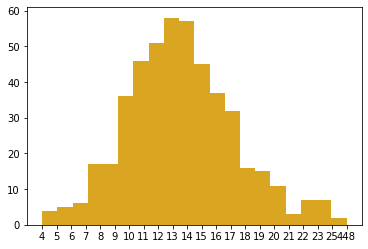

In [38]:
liste_of_occ=Counter(liste_with_all_ingredient_cleaned_)
liste_of_occ=sorted(liste_of_occ.items(), key=lambda t: t[1])
plt.hist(np.array(liste_of_occ)[:,1],20,color = "goldenrod")

<b><p style="color:green;">Etape 2 : On supprime les elements de la poubelle et les elem qui apparaissent moins de 7 fois ( nombre choisi en fonction de l histogramme)</p></b>

In [39]:
#On kik les elem de moins de 7 et les elem de la liste corve
list_elem_to_del=[i[0] for i in liste_of_occ if i[1]<7]+liste_corve
list_elem_to_del=list(set(list_elem_to_del))
#On supprime les elem
df['Ingr']=df['Ingr'].apply(lambda x: ",".join([i for i in x.split(",") if i not in list_elem_to_del]))


In [40]:
print(df.isnull().sum())
print(df.nunique())
print(df.shape)


Marque       0
Ingr         0
Rating       0
Reference    0
dtype: int64
Marque       160
Ingr         506
Rating        29
Reference    505
dtype: int64
(506, 4)


In [41]:

#on utiliseras plus que Ratings et Ingrédients pour notre modèle d'apprentissage non-supervisé  
df = df[["Ingr", "Rating"]]
df

,Ingr,Rating
0,"RICINUS COMMUNIS (CASTOR) SEED OIL, STEARETH-...",2.9
1,"DIMETHICONE, CI 42090 (FD&C BLUE NO, BUTYLPHE...",3.6
2,"\nCINNAMAL, SODIUM PHOSPHATE, ALPHA-ISOMETHYL...",3.9
3,"ALCOHOL DENAT, TOCOPHEROL,#13380 ALCOHOL, HYD...",5.0
4,"CI 42090 (BLUE 1), SODIUM HYALURONATE, PPG-15...",4.9
...,...,...
501,"PARAFFINUM LIQUIDUM, PEG-90 GLYCERYL ISOSTEAR...",4.0
502,"CI 42090 (BLUE 1),#13877 ALCOHOL, (SD ALCOHOL...",4.5
503,"BUTYROSPERMUM PARKII (SHEA BUTTER), CI 61570 ...",4.0
504,"HYDROLYZED CORALLINA OFFICINALIS EXTRACT,DIEN...",4.0


<b><p style="color:blue;font-size:40px;">One Hot Encoding</p></b>

In [42]:
#On divise nos données en plusieurs colonnes d'ingrédients
#
# ',' car nos ingrédients sont séparé par des virgules
ab = df['Ingr'].str.split(',', 19, expand=True)
ab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,RICINUS COMMUNIS (CASTOR) SEED OIL,STEARETH-100,GLYCERYL STEARATE,LIMONENE,60730),CI 77163 (BISMUTH OXYCHLORIDE),17200 (RED 33),BUTYL METHOXYDIBENZOYLMETHANE,GERANIOL,B28669/1),SODIUM COCOAMPHOACETATE,None,None,None,None,None,None,None,None,None
1,DIMETHICONE,CI 42090 (FD&C BLUE NO,BUTYLPHENYL METHYLPROPIONAL,CETYL PEG PPG-10 1 DIMETHICONE,2-HEXANEDIOL,CI 19140 / YELLOW 5,ORANGE 4 (CI 15510),HYDROXYISOHEXYL 3-CYCLOHEXENE CARBOXALDEHYD,POLYQUATERNIUM-7,ALUMINUM CHLOROHYDRATE,C251806/1),AGAR,PARFUM/FRAGRANCE ·AQUA/WATER/EAU,CITRIC ACID – BHT,CI 42090 / BLUE 1,ETHYL ALCOHOL DENAT,#13380 ALCOHOL,CI 42090 (BLUE 1),ALPHA-ISOMETHYL IONONE,None
2,\nCINNAMAL,SODIUM PHOSPHATE,ALPHA-ISOMETHYL IONONE,SODIUM COCOAMPHOACETATE,CI17200,4 (CI 14700),LYCIUM BARBARUM (GOJI BERRY / BAIES DE GOJI) ...,CI19140 (YELLOW 5),DILAURYL THIODIPROPIONATE,COUMARIN,None,None,None,None,None,None,None,None,None,None
3,ALCOHOL DENAT,TOCOPHEROL,#13380 ALCOHOL,HYDROGEN PEROXIDE,DIETHYLAMINO HYDROXYBENZOYL HEXYL BENZOATE,ACRYLATES COPOLYMER,SACCHAROMYCES SILICON FERMENT,DIETHYLHEXYL ADIPATE,URIAGE THERMAL SPRING WATER,\nEUGENOL,DISTEARDIMONIUM HECTORITE,PROPYLENE GLYCOL,VIOLET 2 (F,BENZOATE,EXT,GREEN 5(CI 61570),None,None,None,None
4,CI 42090 (BLUE 1),SODIUM HYALURONATE,PPG-15 STEARYL ETHER,HYDROXYCITRONELLAL,EVERNIA FURFURACEA EXTRACT / TREEMOSS EXTRACT,SYNTHETIC FLUORPHLOGOPITE,PIPERONYL GLUCOSIDE,COVABSORB,DIETHYLAMINO HYDROXYBENZOYL HEXYL BENZOATE –,CI 47005 (D&C YELLOW NO,AQUA / WATER,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,PARAFFINUM LIQUIDUM,PEG-90 GLYCERYL ISOSTEARATE,TRIS(TETRAMETHYLHYDROXYPIPERIDINOL) CITRATE (F,B228531/1),WATER/AQUA/EAU,HYDRATED SILICA,C VIOLET NO,CI 15850,CI 14700/RED 4,POLYSORBATE 60,TOCOPHEROL,BHT,PHENOXYETHANOL,IRVINGIA GABONENSIS KERNEL BUTTER,EVERNIA PRUNASTRI (OAK MOSS) EXTRACT –,WATER ( AQUA),SODIUM COCOAMPHOACETATE,COUMARIN,None,None
502,CI 42090 (BLUE 1),#13877 ALCOHOL,(SD ALCOHOL 39-C) –,WATER (AQUA),HELIANTHUS ANNUUS SEED OIL,ACRYLATES/OCTYLACRYLAMIDE COPOLYMER,ANISE ALCOHOL BHT,\nCOUMARIN,DIETHYLAMINO HYDROXYBENZOYL HEXYL BENZOATE,SYNTHETIC WAX,BUTANE,CERATONIA SILIQUA GUM,POLYSORBATE 60,None,None,None,None,None,None,None
503,BUTYROSPERMUM PARKII (SHEA BUTTER),CI 61570 / GREEN 5 (F,CI 42090 / BLUE 1,HYDROXYPROPYL METHYLCELLULOSE,ALCOHOL DENAT,CHLORPHENESIN,TITANIUM / TITANIUM DIOXIDE,POLYQUATERNIUM-7,CI 42090 / BLUE 1,COMPOUND TO BE CHARMANTE 49389001 DROM,EXT D&,CI 77499 (IRON OXIDES),BHT,B228531/1),None,None,None,None,None,None
504,HYDROLYZED CORALLINA OFFICINALIS EXTRACT,DIENTS PEUT FAIRE L'OBJET DE MODIFICATIONS,GERANIL,\nEUGENOL,AQUA (WATER) – LIMONENE – LINALOOL – ETHYLHEX...,CI 19140(YELLOW 5),SODIUM LAURETH SULFATE,PROPYLENE GLYCOL,C183783/1),WATER/AQUA/EAU,PANTHENOL,[+/- CI 77491,ALCOHOL,CI 77163 (BISMUTH OXYCHLORIDE),ORANGE 4 (CI 15510),OCTYLDODECYL PCA,FARNESOL (F,CITRIC ACID,NIACINAMIDE,None


In [43]:
# Pandas get_dummies function helps us to apply one-hot-encoding to our dataframe.
#Fonctions qui nous aide à appliquer le one-hot-encoding à notre DF
df2 = pd.get_dummies(ab).drop_duplicates()

In [44]:
#On vérifie si on a des éléments dupliqué et donc on les supprime 
df2 = df2.loc[:,~df2.columns.duplicated()]

In [45]:
#On rajoute le ratings à notre df encodé
df2["ratings"] = df.Rating
df2

,0_ \nCINNAMAL,0_ \nCOUMARIN,0_ (SD ALCOHOL 39-C),0_ 17200 (RED 33),0_ 19140 (YELLOW 5),0_ 2 (CI 60730),0_ 2 0,0_ 4 (CI 14700),0_ 60730),0_ 78,...,18_ WATER (AQUA),18_DIENTS PEUT FAIRE L'OBJET DE MODIFICATIONS,18_EUGENOLCITRONELLOL,18_METHYL 2-OCTYNOATE,19_ 1 (CI 42090),19_ CI 60730(EXT,19_ GLYCOGEN,19_ STYRENE/ACRYLATES COPOLYMER,19_ TITANIUM / TITANIUM DIOXIDE,ratings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.6
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.5
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0


In [46]:
#on change de nom
df = df2
del df2

In [47]:
#On affiche les ingrédients les plus utilisés dans notre dataframe
df.sum(axis = 0).sort_values(ascending = False)[1:15]

4_ 2 (CI 60730)                             7.0
6_ CITRIC ACID – BHT                        6.0
3_YELLOW 5 8CI19140)                        6.0
1_ POLYGLYCERYL-10 DECAISOSTEARATE          5.0
4_ PARFUM/FRAGRANCE ·AQUA/WATER/EAU         5.0
7_ BENZYL SALICYLATE                        5.0
1_ HYDROGENATED MICROCRYSTALLINE WAX        5.0
0_ALPHA-ISOMETHYL IONONE                    5.0
3_ \nEUGENOL                                5.0
6_ PEG-8                                    5.0
1_ CALCIUM LACTATE                          5.0
6_ PARFUM (FRAGRANCE) – AQUA (WATER/EAU)    5.0
5_ CI 47005 (D&C YELLOW NO                  5.0
6_ ISOPROPYL ALCOHOL                        5.0
dtype: float64

In [48]:
# Importing needed libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sykze\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



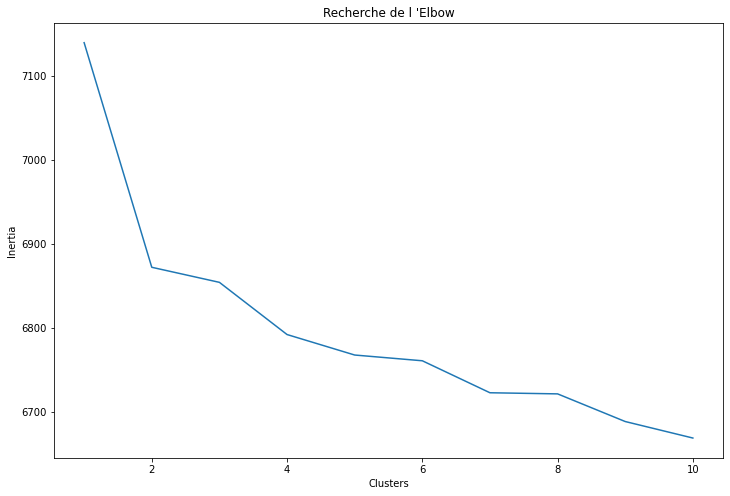

In [49]:
X = df  # On définie la valeurs à modéliser
clusters = []  # on crée une liste vide pour notre cluster 

for i in range(1, 11):   # On cherche le meilleurs n_clusters paramètre pour notre train 
    km = KMeans(n_clusters=i).fit(X)  # model fitting
    clusters.append(km.inertia_) # On rajoute l'inertia score aux clusters List 
    
# Inertia measures how well a dataset was clustered by K-Means.
#Inertia mesure combien un dataset à été "clusteriser" avec K-Means 

# PLOTTING
#On cherche l'elbow qui nous montre la meilleurs valeurs du n_cluster
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Recherche de l \'Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

C:\Users\sykze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



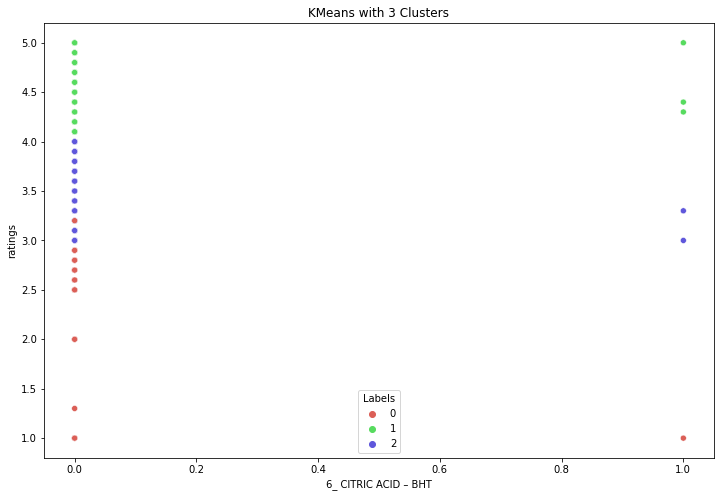

In [50]:
# 3 cluster model
km3 = KMeans(n_clusters=3, random_state= 25).fit(X)

X['Labels'] = km3.labels_ # onssigne X aux DF

plt.figure(figsize=(12, 8))  
#On peut choisir l'une des ingrédinets utilisé plus de 5 fois
sns.scatterplot(X['6_ CITRIC ACID – BHT'], X['ratings'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3)) # scatterplot
# on plot 1 des ingrédients parmis ceux les plus utilités 
# palette pour les couleurs
plt.title('KMeans with 3 Clusters')  
plt.show() 

In [51]:
# I want to add some more plots, therefore I will drop "labels" column for now.
# I store X dataframe in output variable.
output = X
X = X.drop(["Labels"] , 1)
output

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_40996/4039848311.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,0_ \nCINNAMAL,0_ \nCOUMARIN,0_ (SD ALCOHOL 39-C),0_ 17200 (RED 33),0_ 19140 (YELLOW 5),0_ 2 (CI 60730),0_ 2 0,0_ 4 (CI 14700),0_ 60730),0_ 78,...,18_DIENTS PEUT FAIRE L'OBJET DE MODIFICATIONS,18_EUGENOLCITRONELLOL,18_METHYL 2-OCTYNOATE,19_ 1 (CI 42090),19_ CI 60730(EXT,19_ GLYCOGEN,19_ STYRENE/ACRYLATES COPOLYMER,19_ TITANIUM / TITANIUM DIOXIDE,ratings,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.9,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.6,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.9,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,2
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.5,1
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,2
504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,2


In [52]:
#On checkout nos valeurs inertia
inertia = []  # liste d'inertia
for k in range(1, 8):  # on choisi la range 1-8
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

C:\Users\sykze\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



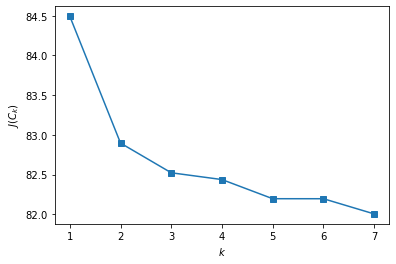

In [53]:
# Plot les k valeurs avec inertia

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [54]:
#On regarde les ore de silhouette
# ainsi que la moyenne

from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # nombre de clusters
clusters_inertia = [] # inertia de clusters
s_scores = [] # silhouette score

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++', random_state= 25).fit(X)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

In [55]:
silhouette_avg

-0.0013430085018403715

In [56]:
for idx, score in enumerate(s_scores):
    print(idx,"clusters >> ", "silhouette score is" ,score)

0 clusters >>  silhouette score is 0.036227103885610346
1 clusters >>  silhouette score is 0.015523125890598889
2 clusters >>  silhouette score is 0.0006592104532288375
3 clusters >>  silhouette score is 0.012233705344115223
4 clusters >>  silhouette score is 0.0001487231062930258
5 clusters >>  silhouette score is 0.006851682219485666
6 clusters >>  silhouette score is 0.003593647294055814
7 clusters >>  silhouette score is -0.007031348292321058
8 clusters >>  silhouette score is -0.0013430085018403715


In [57]:
for idx, score in enumerate(clusters_inertia):
    print(idx,"clusters >> ", "inertia score is",  score)

0 clusters >>  inertia score is 6871.797303370762
1 clusters >>  inertia score is 6811.198678129689
2 clusters >>  inertia score is 6801.74726537901
3 clusters >>  inertia score is 6781.726211538463
4 clusters >>  inertia score is 6781.85582430413
5 clusters >>  inertia score is 6722.844323140624
6 clusters >>  inertia score is 6724.586640347098
7 clusters >>  inertia score is 6707.871834152666
8 clusters >>  inertia score is 6683.30306354298


In [63]:
#on les affiche dans un dataframe avec leurs sizes

KM_5_clusters = KMeans(n_clusters=3, init='k-means++', random_state= 25).fit(X) # fit k-means

KM5_clustered = X.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # rajouter labels aux points
KM5_clustered

,0_ \nCINNAMAL,0_ \nCOUMARIN,0_ (SD ALCOHOL 39-C),0_ 17200 (RED 33),0_ 19140 (YELLOW 5),0_ 2 (CI 60730),0_ 2 0,0_ 4 (CI 14700),0_ 60730),0_ 78,...,18_DIENTS PEUT FAIRE L'OBJET DE MODIFICATIONS,18_EUGENOLCITRONELLOL,18_METHYL 2-OCTYNOATE,19_ 1 (CI 42090),19_ CI 60730(EXT,19_ GLYCOGEN,19_ STYRENE/ACRYLATES COPOLYMER,19_ TITANIUM / TITANIUM DIOXIDE,ratings,Cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.9,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.6,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.9,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,2
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.5,1
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,2
504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,2


In [59]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

# Cluster 0 - 60
# Cluster 1 - 258
# Cluster 2 - 188

,KM_size
Cluster,
0,60
1,258
2,188


### 3D PLOTS

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_40996/4109713716.py:4: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



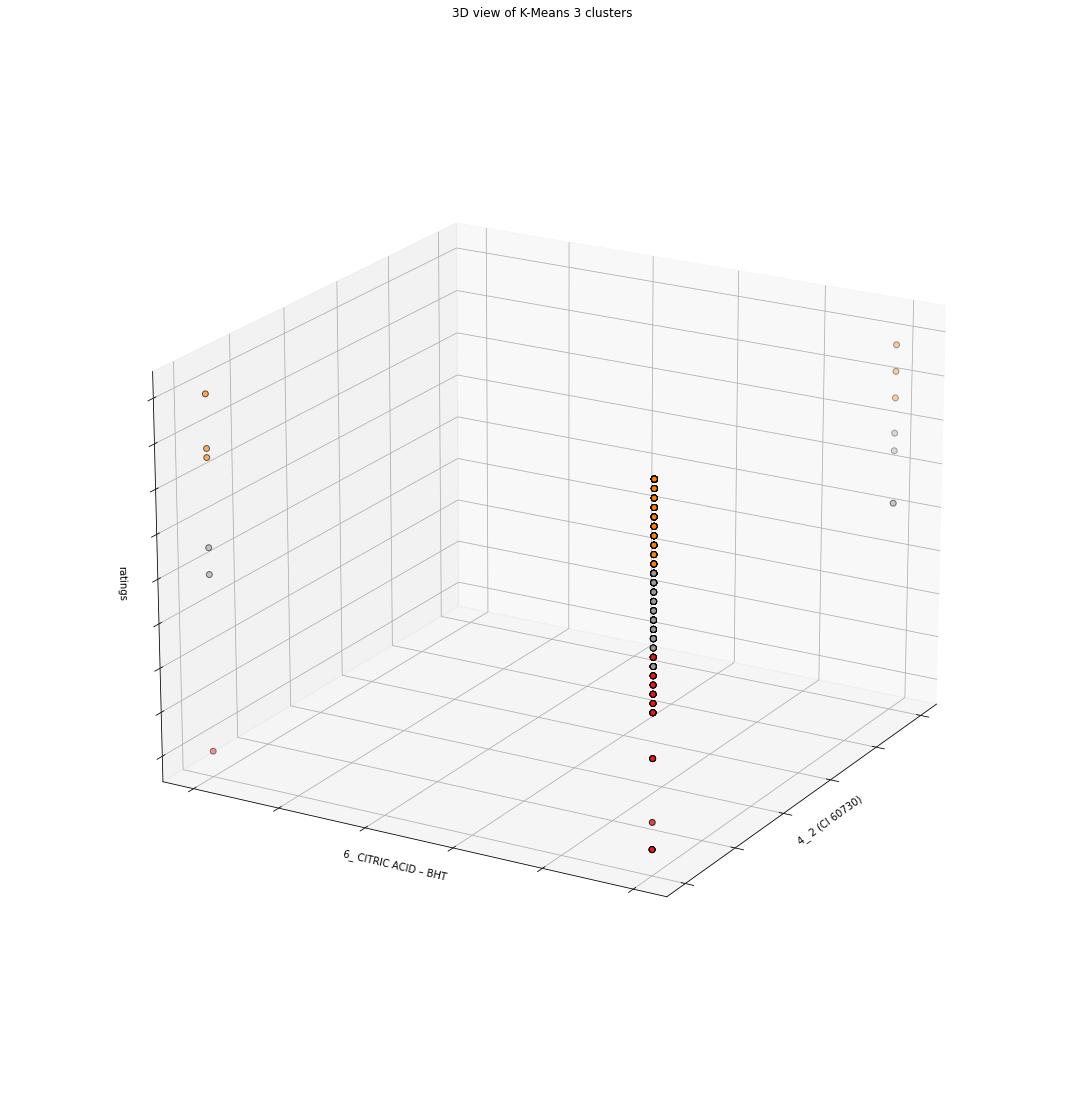

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['4_ 2 (CI 60730)'],
           KM5_clustered['6_ CITRIC ACID – BHT'],
           KM5_clustered['ratings'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('4_ 2 (CI 60730)')
ax.set_ylabel('6_ CITRIC ACID – BHT')
ax.set_zlabel('ratings')
ax.set_title('3D view of K-Means 3 clusters')
ax.dist = 12

plt.show()

In [61]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['4_ 2 (CI 60730)'],
        y = db[db['Cluster']==n]['6_ CITRIC ACID – BHT'],
        z = db[db['Cluster']==n]['ratings'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 3
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')


data = [trace0, trace1, trace2]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = '4_ 2 (CI 60730)'),
            yaxis = dict(title = '6_ CITRIC ACID – BHT'),
            zaxis = dict(title = 'ratings')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [62]:
np.sum(output.loc[output.Labels == 1], axis = 0).sort_values(ascending = False)[2:20]

5_ CI 47005 (D&C YELLOW NO                  5.0
6_ PARFUM (FRAGRANCE) – AQUA (WATER/EAU)    4.0
1_ BENZYL BENZOATE                          4.0
8_HYDROXYCITRONELLAL                        4.0
11_ B217785/1)                              4.0
7_ALPHA-ISOMETHYL IONONE                    4.0
3_ CI 77163 (BISMUTH OXYCHLORIDE)           4.0
6_ CI 60730 (EXT VIOLET 2)                  4.0
1_ SUCROSE ACETATE ISOBUTYRATE              4.0
5_C YELLOW NO                               3.0
10_ \nCINNAMAL                              3.0
9_ CETEARYL ALCOHOL                         3.0
1_ BENZYLALCOHOL                            3.0
2_ ALPHA-ISOMETHYL IONONE                   3.0
4_ EXT VIOLET 2 (C                          3.0
7_ CETYL PEG PPG-10 1 DIMETHICONE           3.0
2_ METHYL ANTHRANILATE                      3.0
8_ HYDROGENATED COCO-GLYCERIDES             3.0
dtype: float64